# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [17]:
df = pd.read_csv("dataset_regresion_multiple.csv")

In [19]:
display(df.head())

,edad;horas_ejercicio;peso;estres;ingresos;horas_tv;presion_arterial
0,58;7;81;1;21150;12;73.83
1,48;2;55;1;94740;22;82.26
2,34;2;81;3;86617;24;90.47
3,62;0;53;6;36896;34;93.49
4,27;4;60;7;66175;29;65.74


# Se delimita por ; para poder ver visualizar mejor lo datos del data set usando (sep=";")

In [35]:
df = pd.read_csv("dataset_regresion_multiple.csv",encoding= "ISO-8859-1", sep=";")

# Describir el dataset (medias, máximos, mínimos, correlaciones)

In [75]:
print("Datos del data set")
display(df.head())
print("\nDescripcion del data set")
display(df.describe())
print("\nCorrelaciones con presión arterial:")
print(df.corr()["presion_arterial"].sort_values(ascending=False))

Datos del data set


,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
0,58,7,81,1,21150,12,73.83
1,48,2,55,1,94740,22,82.26
2,34,2,81,3,86617,24,90.47
3,62,0,53,6,36896,34,93.49
4,27,4,60,7,66175,29,65.74



Descripcion del data set


,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,41.600000,4.370000,73.28000,4.700000,59778.350000,19.760000,85.395000
std,13.311346,3.013957,14.29917,2.512595,23603.253158,11.136545,20.531869
min,20.000000,0.000000,50.00000,1.000000,20412.000000,0.000000,38.140000
25%,30.000000,2.000000,60.00000,3.000000,38042.000000,11.000000,72.045000
50%,41.500000,4.000000,73.00000,5.000000,58634.500000,18.500000,84.415000
75%,53.250000,7.000000,84.00000,7.000000,80475.250000,28.250000,98.465000
max,64.000000,9.000000,99.00000,9.000000,99605.000000,39.000000,137.270000



Correlaciones con presión arterial:
presion_arterial    1.000000
peso                0.588843
edad                0.418731
estres              0.366368
horas_tv            0.040789
ingresos           -0.009394
horas_ejercicio    -0.358865
Name: presion_arterial, dtype: float64


# Visualización de correlaciones

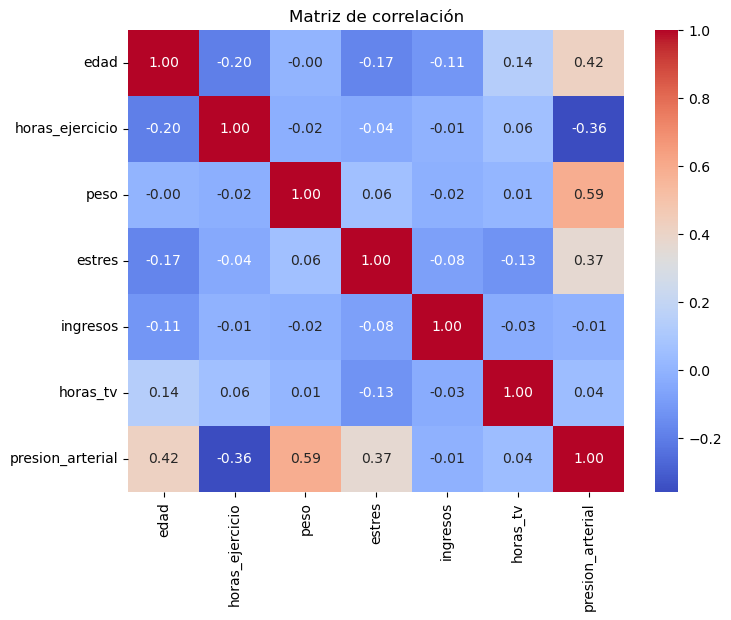

In [77]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Modelo de regresión lineal múltiple  

In [107]:
# Definir variables predictoras (X) y variable objetivo (y)

X = df.drop("presion_arterial", axis=1)
y = df["presion_arterial"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo con todas las variables
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo:

In [109]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nEvaluación del modelo con todas las variables:")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


Evaluación del modelo con todas las variables:
R²: 0.708
RMSE: 10.36
MAE: 8.60


# Modelo simplificado con variables mas relevantes por su correlación

In [113]:
X_simple = df[["edad","peso","estres","horas_ejercicio"]]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

modelo_sim = LinearRegression()
modelo_sim.fit(X_train_s, y_train_s)
y_pred_s = modelo_sim.predict(X_test_s)

# Evaluación del modelo simple

In [117]:
r2_s = r2_score(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
mae_s = mean_absolute_error(y_test_s, y_pred_s)

print("\nEvaluación del modelo simple:")
print(f"R²: {r2_s:.3f}")
print(f"RMSE: {rmse_s:.2f}")
print(f"MAE: {mae_s:.2f}")


Evaluación del modelo simple:
R²: 0.743
RMSE: 9.72
MAE: 8.23
